<a href="https://colab.research.google.com/github/Nortron435/Projects/blob/main/Customer_Behavior_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Directing customers to subscription through app behavior analysis

**Business Challenge**

In this project I'll work on the data of fintech company that wants to provide its customers with a paid mobile ap subscription that allow them to track all of their finances in one place. To attract customers, the company releases a free version of their app with some of the main features unlocked. The company has tasked me to identify which users will most likely not enroll in the paid product, so that additional offers can be given to them. Because of the costs of these offers, the company does not want to offer them to everybody, especially customers who were going to enroll anyways.

**Data Description**

The data for this project is manufactured based on trends found in real world case studies. The fields describe what companis usually track from their users, and the distributions are based on observed distributions in real world analysis. 

The data constitutes of customer's app behaviour for 24 hours during which app is free to access, this allows me to see the date and time of app installation, as well as the features the users engaged with within the app. App behavior is characterized as the list of app screens the user looked at, and whether the user played the financial mini-games available.


In [149]:
#Importing the libraries and dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil import parser

dataset= pd.read_csv('appdata10.csv')

In [150]:
dataset.head()

,user,first_open,dayofweek,hour,age,screen_list,numscreens,minigame,used_premium_feature,enrolled,enrolled_date,liked
0,235136,2012-12-27 02:14:51.273,3,02:00:00,23,"idscreen,joinscreen,Cycle,product_review,ScanP...",15,0,0,0,NaN,0
1,333588,2012-12-02 01:16:00.905,6,01:00:00,24,"joinscreen,product_review,product_review2,Scan...",13,0,0,0,NaN,0
2,254414,2013-03-19 19:19:09.157,1,19:00:00,23,"Splash,Cycle,Loan",3,0,1,0,NaN,1
3,234192,2013-07-05 16:08:46.354,4,16:00:00,28,"product_review,Home,product_review,Loan3,Finan...",40,0,0,1,2013-07-05 16:11:49.513,0
4,51549,2013-02-26 18:50:48.661,1,18:00:00,31,"idscreen,joinscreen,Cycle,Credit3Container,Sca...",32,0,0,1,2013-02-26 18:56:37.841,1


In [151]:
dataset.describe()

,user,dayofweek,age,numscreens,minigame,used_premium_feature,enrolled,liked
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,186889.729900,3.029860,31.72436,21.095900,0.107820,0.172020,0.621480,0.165000
std,107768.520361,2.031997,10.80331,15.728812,0.310156,0.377402,0.485023,0.371184
min,13.000000,0.000000,16.00000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,93526.750000,1.000000,24.00000,10.000000,0.000000,0.000000,0.000000,0.000000
50%,187193.500000,3.000000,29.00000,18.000000,0.000000,0.000000,1.000000,0.000000
75%,279984.250000,5.000000,37.00000,28.000000,0.000000,0.000000,1.000000,0.000000
max,373662.000000,6.000000,101.00000,325.000000,1.000000,1.000000,1.000000,1.000000


From this I can see that,

1. The average age of the app user is 32 and The average number of screens used by the user is 21. 
2. Mini game has been played by 10% of people and 70% people has used the premium features.
3. Total 62% people has been enrolled in the dataset  and almost 70% of people have liked at least 1 feature. 

The hour column in this data is a string and to convert is into integer we are going to slice the string and then convert it into an integer.

**Data Cleaning**

In [152]:
dataset['hour']=dataset.hour.str.slice(1,3).astype(int)

#Removing unnecessary 
dataset2 = dataset.copy().drop(columns=['user','screen_list','enrolled_date','first_open','enrolled'])


**Exploratory Data Analysis**

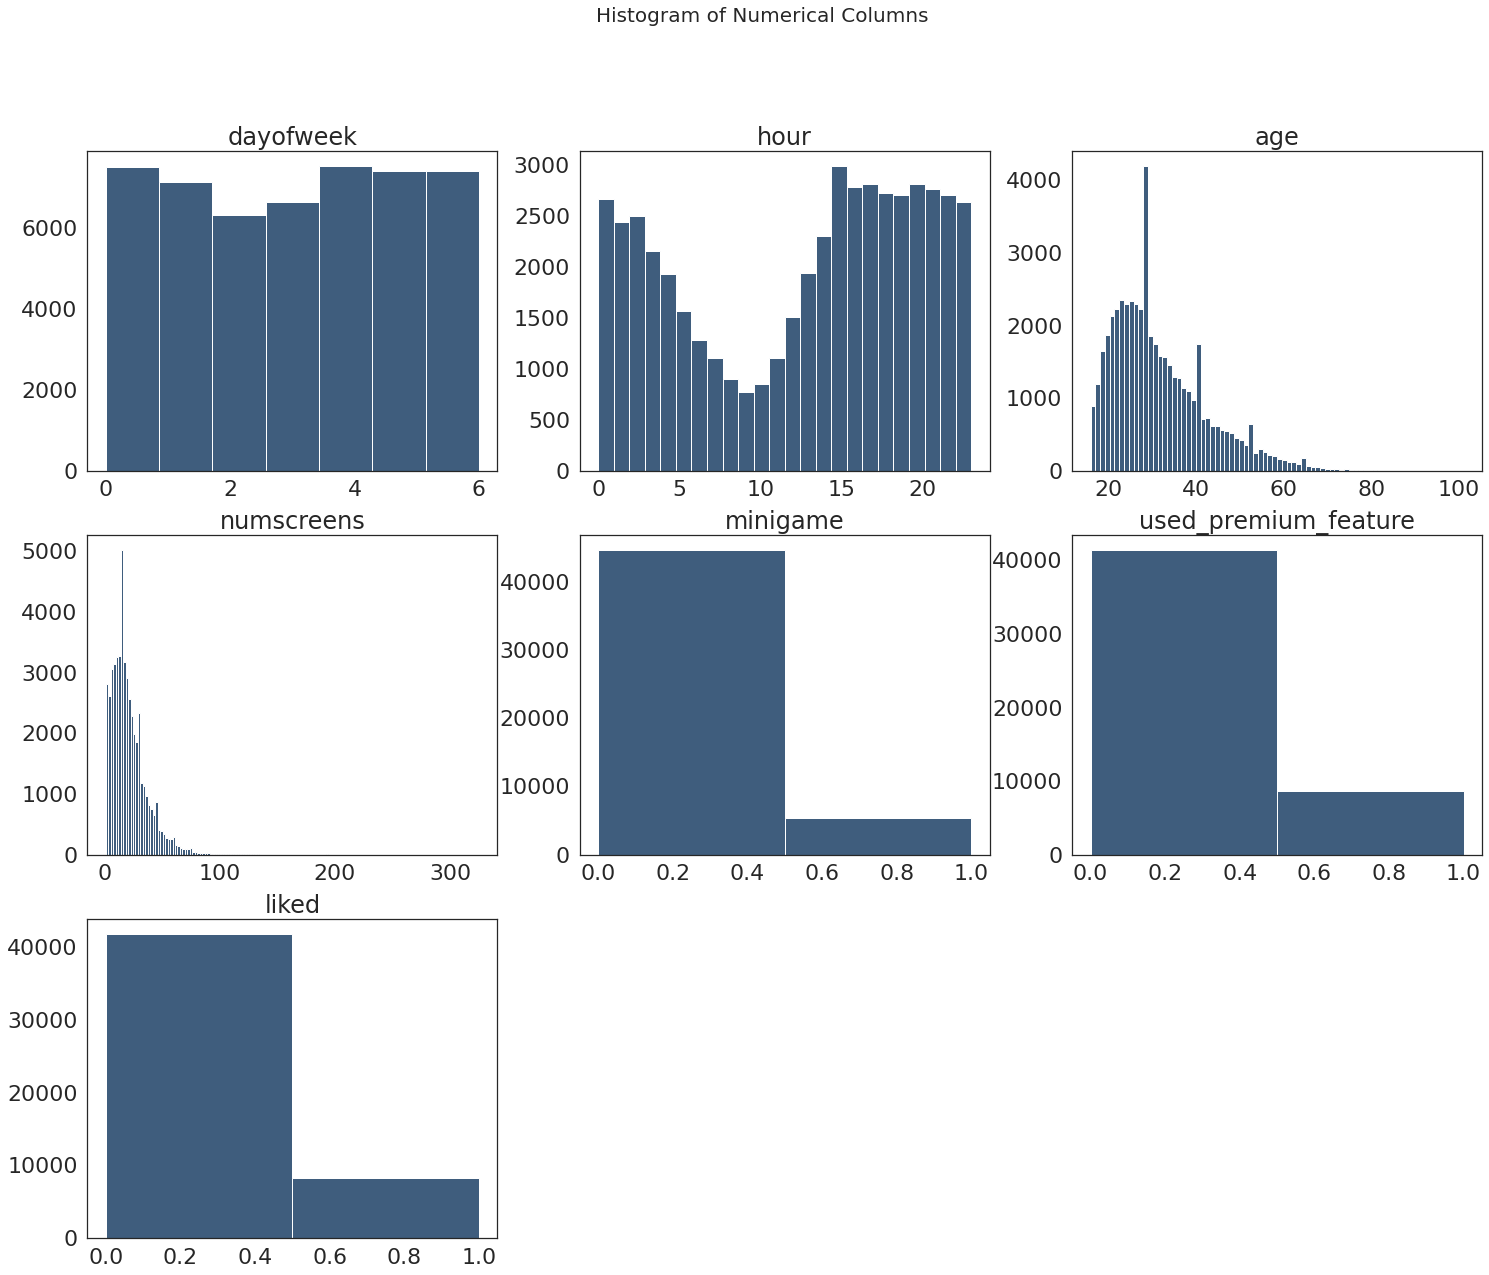

In [153]:
#Creating Histograms
plt.figure(figsize=(25,20))
plt.suptitle('Histogram of Numerical Columns', fontsize = 20)
for i in range(1, dataset2.shape[1]+1):
  plt.subplot(3,3,i)
  f = plt.gca()
  f.set_title(dataset2.columns.values[i-1])

  vals = np.size(dataset2.iloc[:,i-1].unique())

  plt.hist(dataset2.iloc[:,i-1],bins= vals, color='#3F5D7D')

Here I am going to create a correlation plot between the our features and response variable. This will tell how does each independent feature affect the response variable and which features are important for our analysis and has maximum effect on our response variable.

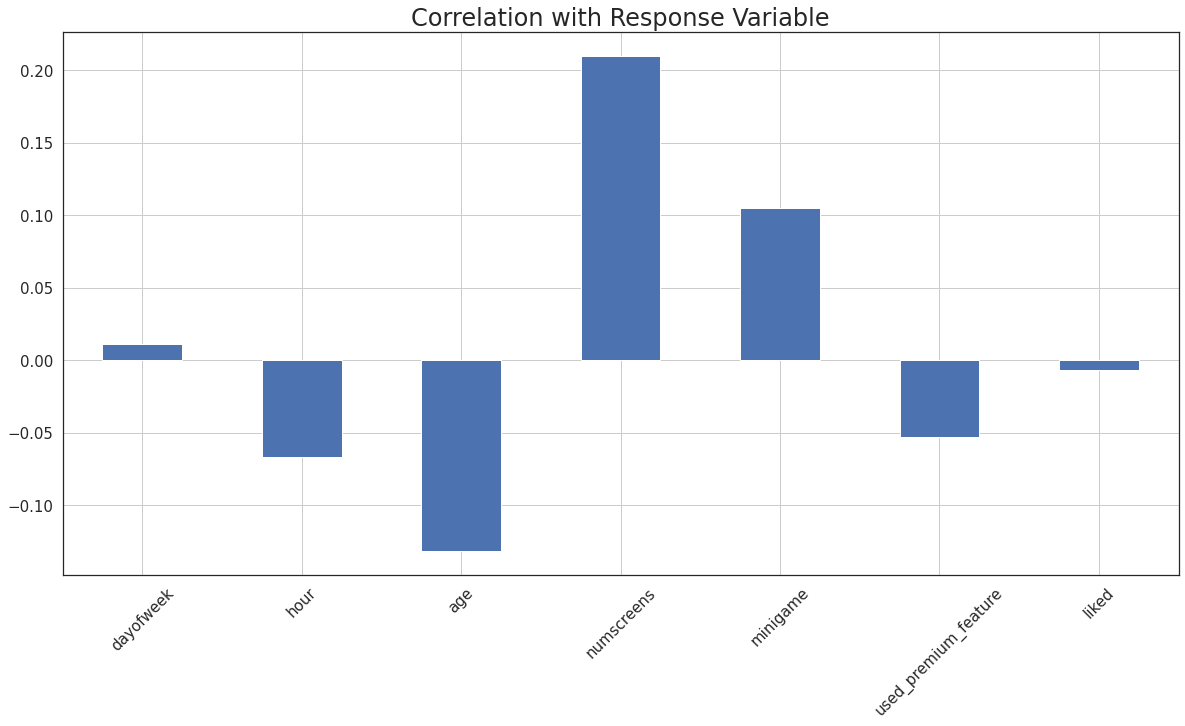

In [154]:
#Correlation with Response
dataset2.corrwith(dataset.enrolled).plot.bar(figsize=(20,10),title='Correlation with Response Variable',
                                             fontsize=15, rot=45, grid= True)

1. Day of the week is positively correlated with the response this means that customer is more likely to enroll at the later day of the week. 
2. Hours are negatively correlated that means customers are more likely to enroll at late hours of the night. 
3. Age is negatively related as well, this means that young people are more likely to enroll in this app than the older people.
4. The number of screens is positively correlated with the response variable this means that more app use will result in more enrollment, same goes for the mini-game.
5. In case of premium feature, it is negatively correalted this means that customer who has used the premium feature may not enroll for the app. This may be because the premium feature has failed to convice the user to purchase the app.

Here I will create correlation matrix to find out feature columns which are highly correlated with each other, for better results it is important to have columns which are independent of each other and to fulfill this coulmns with high correlation needs to be discarded from our analysis.

<ipython-input-155-db90de06eca7>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


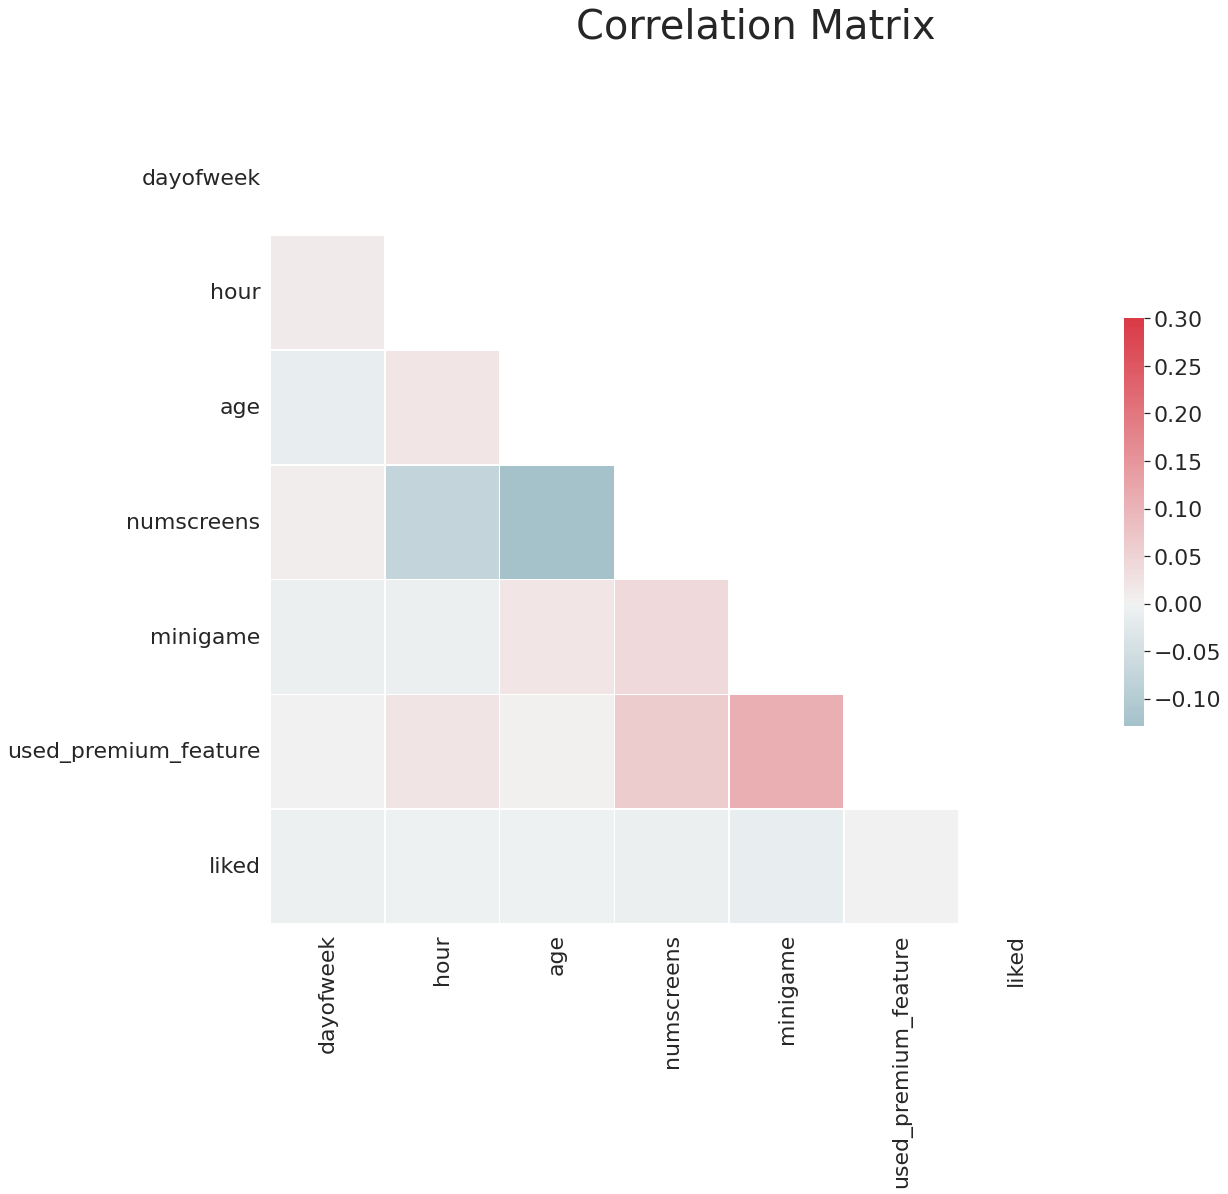

In [155]:
## Correlation Matrix
sns.set(style="white", font_scale=2)
# Compute the correlation matrix
corr = dataset2.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 15))
f.suptitle("Correlation Matrix", fontsize = 40)
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

There are some relationships between the data but nothing indicates that there is a linear dependence between the variables and assumption can be made that all of these are independent variables.

**Feature Engineering**

The main part of feature engineering process for the model is fine tunning the response variable. It is important to set a limit on when the user will be converted into a paid member for the model to provide the accurate prediction in timely manner. The company can not wait for all time enrollment, they need to target users which can be enrolled within specified timeframe.

In [156]:
dataset.dtypes

user                     int64
first_open              object
dayofweek                int64
hour                     int64
age                      int64
screen_list             object
numscreens               int64
minigame                 int64
used_premium_feature     int64
enrolled                 int64
enrolled_date           object
liked                    int64
dtype: object

In [157]:
#Converting dates into date-time objects.
dataset["first_open"]= [parser.parse(row_data) for row_data in dataset["first_open"]]
dataset["enrolled_date"]= [parser.parse(row_data) if isinstance(row_data,str) else row_data for row_data in dataset["enrolled_date"]]

In [158]:
dataset.dtypes

user                             int64
first_open              datetime64[ns]
dayofweek                        int64
hour                             int64
age                              int64
screen_list                     object
numscreens                       int64
minigame                         int64
used_premium_feature             int64
enrolled                         int64
enrolled_date           datetime64[ns]
liked                            int64
dtype: object

In [159]:
#Finding the difference between both dates
dataset["difference"]=(dataset.enrolled_date - dataset.first_open).astype('timedelta64[h]')

Text(0.5, 1.0, 'Distribution of Time since enrolled')

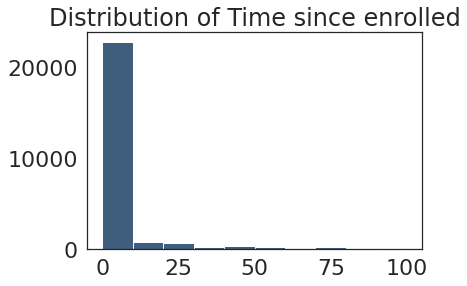

In [160]:
plt.hist(dataset["difference"].dropna(), color="#3F5D7D", range=[0,100])
plt.title('Distribution of Time since enrolled')

From this I can see that majority of people enrolled within first few hours. But to be more exact I am going to set 48 hours as cut-off time for the response variable.

In [161]:
dataset.loc[dataset.difference>48,'enrolled']=0

I am going to keep customers who have enrolled to the app within first 48 hours as enrolled and customers who have enrolled after 48 hours are going to be removed. Also these columns have provided useful insights and won't be needed for further predictions so I'm going to drop them. 

In [162]:
dataset = dataset.drop(columns=['difference','enrolled_date','first_open'])

The screen list is a comma separated string, it shows which screens were visited by the user during the 24 hours period. Because of its format I can not use it in the model and I need to convert it into actual format so the model can read. One way to solve this problem is to create columns for each entry but because there are a lot data we can not create each column so I am going to use different data file for the top screens used by the user. I am going to create columns for the popular screens and for the rest there will be one column.

In [163]:
top_screens = pd.read_csv('top_screens.csv').top_screens.values

In [164]:
dataset["screen_list"]=dataset.screen_list.astype(str)+','

for sc in top_screens:
  dataset[sc]= dataset.screen_list.str.contains(sc).astype(int)
  dataset["screen_list"] = dataset.screen_list.str.replace(sc+",","")

In [165]:
#Creating final column for other screens
dataset["Other"]=dataset.screen_list.str.count(",")

In [166]:
#Droping the screen list column
dataset = dataset.drop(columns=["screen_list"])

In [167]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 68 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   user                     50000 non-null  int64
 1   dayofweek                50000 non-null  int64
 2   hour                     50000 non-null  int64
 3   age                      50000 non-null  int64
 4   numscreens               50000 non-null  int64
 5   minigame                 50000 non-null  int64
 6   used_premium_feature     50000 non-null  int64
 7   enrolled                 50000 non-null  int64
 8   liked                    50000 non-null  int64
 9   Loan2                    50000 non-null  int64
 10  location                 50000 non-null  int64
 11  Institutions             50000 non-null  int64
 12  Credit3Container         50000 non-null  int64
 13  VerifyPhone              50000 non-null  int64
 14  BankVerification         50000 non-null  int64
 15  Ve

In this there are multiple coulmns of screens which belongs to the similar category of screen and they will be highly correlated with each other. Because of this I am going to create a funnel for each type of screens which have multple screens such as Savings, Loan, Credit Card ,etc. and I am going to keep count from each screen and then drop them to make data more clean.

In [168]:
# Funnels
#Savings
savings_screens = ["Saving1",
                    "Saving2",
                    "Saving2Amount",
                    "Saving4",
                    "Saving5",
                    "Saving6",
                    "Saving7",
                    "Saving8",
                    "Saving9",
                    "Saving10"]
dataset["SavingCount"] = dataset[savings_screens].sum(axis=1)
dataset = dataset.drop(columns=savings_screens)
#Credit
cm_screens = ["Credit1",
               "Credit2",
               "Credit3",
               "Credit3Container",
               "Credit3Dashboard"]
dataset["CMCount"] = dataset[cm_screens].sum(axis=1)
dataset = dataset.drop(columns=cm_screens)
#Credit Cards
cc_screens = ["CC1",
                "CC1Category",
                "CC3"]
dataset["CCCount"] = dataset[cc_screens].sum(axis=1)
dataset = dataset.drop(columns=cc_screens)
#Loan
loan_screens = ["Loan",
               "Loan2",
               "Loan3",
               "Loan4"]
dataset["LoansCount"] = dataset[loan_screens].sum(axis=1)
dataset = dataset.drop(columns=loan_screens)

In [169]:
#Creating new data from this
dataset.to_csv('new_appdata10.csv', index = False)

**Data Preprocessing**

In [170]:
#Separating Independent variables and dependent variable
dataset_new = pd.read_csv('new_appdata10.csv')
response = dataset["enrolled"]
dataset_new = dataset_new.drop(columns = 'enrolled')

In [171]:
#Splitting the training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset_new, response,test_size = 0.2,random_state = 0)

User ID is not useful for our predictions but it is important for identifying the user after the predictions. I am going to keep it in different variable for end results.

In [172]:
#Removing identifiers
train_identifier = X_train['user']
X_train = X_train.drop(columns='user')
test_identifier = X_test['user']
X_test = X_test.drop(columns='user')

**Feature Scaling**

In [173]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

The standard scaling is carried out because I don't want any particular numerical value to have greater influence on the model simply beacuse its absoulte values are very large

In [174]:
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_train2.columns = X_train.columns.values
X_test2.columns = X_test.columns.values
X_train2.index = X_train.index.values
X_test2.index = X_test.index.values
X_train = X_train2
X_test = X_test2

**Model Building**

In [180]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, penalty='l1', solver='liblinear')

This penalty is going to change this logistic regression model to L1 regularization model or Lasso Regression model. The reason behind applying this penalty is that screen can be correlated to each other and I have removed all the screens that belongs to the same set such as savings or loan. But there may be other correlation that exist, even though the screens do not belong to the same set. L1 penalty penalizes any particular field that is strongly correlated to the response variable. If any one screen is strongly correlated with the response variable, let's say if customers liked the Rewards provided by the bank and they jump into enrollment immediately that means Rewards screen will have strong correlation with the response variable and the Rewards feature will get higher coefficient in the Logistic Regression model. So the L1 Regularization penalizes those cases in which one particular feature gets a very big coefficient.

In [181]:
#Making the predictions
classifier.fit(X_train,y_train)
y_pred= classifier.predict(X_test)

**Evaluating Results**

In [193]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
print("Accuracy of the model is",accuracy_score(y_test, y_pred))
print("Precision shows out of all the positive predictions how many were correctly predicted")
print(precision_score(y_test, y_pred))
print("Recall score shows us out of all the correct predictions how many were positive")
print(recall_score(y_test, y_pred))
print("F1 score is",f1_score(y_test, y_pred))


Accuracy of the model is 0.7681
Precision shows out of all the positive predictions how many were correctly predicted
0.7618952017667135
Recall score shows us out of all the correct predictions how many were positive
0.7700892857142857
F1 score is 0.7659703300030276


Test Data Accuracy: 0.7681


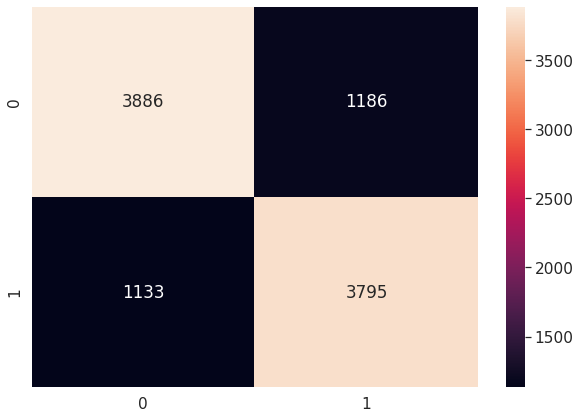

In [196]:
#Plotting confusion matrix
cm = confusion_matrix(y_test,y_pred)
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % accuracy_score(y_test, y_pred))


**Croos-Validation**

Cross-validation is carried out to check whether model is is not overfitted on the data.

In [197]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X= X_train, y= y_train, cv=10)
print("Logistic Accuracy: %0.3f (+/- %0.3f)" % (accuracies.mean(), accuracies.std() * 2))

Logistic Accuracy: 0.767 (+/- 0.009)


**Model Optimization**

Even though I got 76% accuracy from my model, I am going to see if there is still any room for improvement here. Grid search is the approach I am going to use for finding out best parameters for the model.

In [204]:
from sklearn.model_selection import GridSearchCV
# Select Regularization Method
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.1, 0.5, 0.9, 1, 2, 5]

# Combine Parameters
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = "accuracy",
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [205]:
#Best Parameters and best scores
rf_best_accuracy = grid_search.best_score_
rf_best_parameters = grid_search.best_params_
rf_best_accuracy, rf_best_parameters
grid_search.best_score_

0.76725

Even after optimization the accuracy for the model is still same. So finally displaying the output for each user.

In [212]:
# Formatting Final Results
final_results = pd.concat([y_test, test_identifier], axis = 1).dropna()
final_results['predicted_reach'] = y_pred
final_results = final_results[['user', 'enrolled', 'predicted_reach']].reset_index(drop=True)
final_results

,user,enrolled,predicted_reach
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
...,...,...,...
9995,143036,1,0
9996,91158,1,1
9997,248318,0,0
9998,142418,1,1


**Conclusions**



*   The model will label every new user as "Highly Likely" (or "Unlikely") to subscribe. It can further validate results by running our predictions on daily new installs, and see whether the accuracy is consistent. From there the company can narrow down the marketing efforts only to those users which are unlikely to subscribe and thus increase the subscription rate.
*  The increase in overall subscriptions can measure the benefits of this model to the company. The users which are already likely to subscribe will do so, and although company can still give them offers they don't have to go all out. On other hand, users who are likely to leave may convert to paid subscribers if company can give them an offer they cannot refuse. For example, these offers can come in the form of '1st month free', or '50% off yearly subscriptions'. The latter shows that great offers can still be structured in a way that brings overall benefit to the company because they will be locking the user in for an extended period.

